In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
!cat 1gram.tsv  | egrep '[a-zA-Z]' | head -1000000  > /tmp/1

In [3]:
df = pd.read_csv('/tmp/1', sep='\t', header=-1)

In [4]:
df.describe()

,1
count,1.000000e+06
mean,3.827480e+05
std,3.576764e+07
min,1.586000e+03
25%,2.483000e+03
50%,4.728000e+03
75%,1.487300e+04
max,2.368841e+10


In [5]:
df.columns = ['token', 'count']

In [6]:
df.count = df['count'].astype(float)

In [7]:
total = df.count.sum()

In [8]:
df['p'] = df.count / total
df['log_p'] = np.log2(df['p'])
df['ent'] = df['p'] * df['log_p']

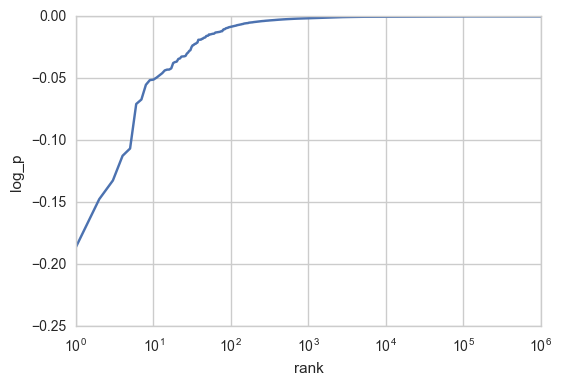

In [9]:
plt.plot(df.ent)
#plt.plot(df.log_p)
plt.xlabel('rank')
plt.ylabel('log_p')
plt.xscale('log')

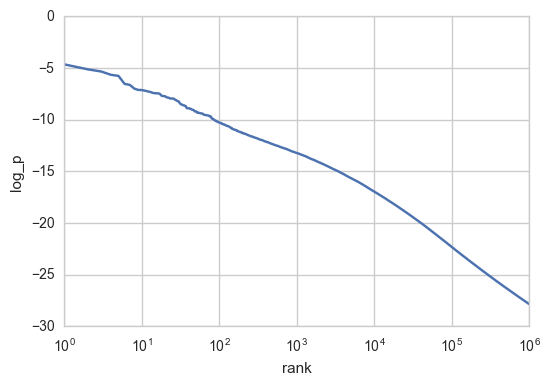

In [10]:
#plt.plot(df.ent)
plt.plot(df.log_p)
plt.xlabel('rank')
plt.ylabel('log_p')
plt.xscale('log')

In [11]:
def rank_to_word(i):
    if i < 10**1: return 'extremely common'
    if i < 10**2: return 'very common'
    if i < 10**3: return 'common'
    if i < 10**4: return 'common'
    if i < 10**5: return 'uncommon'
    return 'rare'

In [12]:
df['description'] = df.index.map(rank_to_word)

In [13]:
df.head(100)

,token,count,p,log_p,ent,description
0,the,23688414489,0.061890,-4.014141,-0.248437,extremely common
1,of,15342397280,0.040085,-4.640799,-0.186026,extremely common
2,and,11021132912,0.028795,-5.118050,-0.147373,extremely common
3,to,9494905988,0.024807,-5.333097,-0.132299,extremely common
4,in,7611765281,0.019887,-5.652020,-0.112403,extremely common
5,a,7083003595,0.018506,-5.755890,-0.106517,extremely common
6,is,4139526351,0.010815,-6.530785,-0.070632,extremely common
7,that,3870260345,0.010112,-6.627820,-0.067019,extremely common
8,for,3021925527,0.007895,-6.984783,-0.055147,extremely common
9,The,2763139452,0.007219,-7.113943,-0.051357,extremely common


In [14]:
df.tail(20)

,token,count,p,log_p,ent,description
999980,Mandabi,1586,4.143718e-09,-27.846427,-1.153878e-07,rare
999981,Makeshifts,1586,4.143718e-09,-27.846427,-1.153878e-07,rare
999982,Magnell,1586,4.143718e-09,-27.846427,-1.153878e-07,rare
999983,MONORAIL,1586,4.143718e-09,-27.846427,-1.153878e-07,rare
999984,MISAMIS,1586,4.143718e-09,-27.846427,-1.153878e-07,rare
999985,Lopps,1586,4.143718e-09,-27.846427,-1.153878e-07,rare
999986,Logements,1586,4.143718e-09,-27.846427,-1.153878e-07,rare
999987,Llawhaden,1586,4.143718e-09,-27.846427,-1.153878e-07,rare
999988,Lissapol,1586,4.143718e-09,-27.846427,-1.153878e-07,rare
999989,Lexikons,1586,4.143718e-09,-27.846427,-1.153878e-07,rare


In [15]:
df['ent'].sum()

-11.331310766711738

In [16]:
df.ix[np.random.choice(df.index.values, 50)].sort_index()

,token,count,p,log_p,ent,description
12331,halfway,2251391,5.882176e-06,-17.375219,-1.022041e-04,uncommon
28523,Profession,637729,1.666185e-06,-19.195020,-3.198245e-05,uncommon
30246,Outdoor,581630,1.519616e-06,-19.327862,-2.937093e-05,uncommon
72900,Skies,129040,3.371409e-07,-21.500145,-7.248578e-06,uncommon
97740,Ludovic,76604,2.001421e-07,-22.252472,-4.453657e-06,uncommon
100457,Wrench,72735,1.900336e-07,-22.327242,-4.242927e-06,rare
107180,belay,64922,1.696207e-07,-22.491184,-3.814971e-06,rare
132617,desalting,44420,1.160555e-07,-23.038682,-2.673765e-06,rare
175092,MSK,27324,7.138901e-08,-23.739723,-1.694755e-06,rare
233052,subtribes,16754,4.377293e-08,-24.445386,-1.070046e-06,rare
